In [ ]:
# library(ggplot2)

In [88]:
all_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/covid/variance_dfs/"
list.files(all_dir)

[1] "full_datasets_folder" "gastrulation_folder"  "Habermann_folder"    
[4] "Madissoon_folder"     "Reyfman_folder"       "Vieira_folder"

In [89]:
mydir = paste0(all_dir,list.files(all_dir)[2],"/")

In [90]:
myfiles = list.files(mydir)
head(myfiles)
length(myfiles)

[1] "celltype_Allantois.full_sample_17.partial_sample_29.csv"
[2] "celltype_Allantois.full_sample_17.partial_sample_36.csv"
[3] "celltype_Allantois.full_sample_17.partial_sample_37.csv"
[4] "celltype_Allantois.full_sample_29.partial_sample_17.csv"
[5] "celltype_Allantois.full_sample_29.partial_sample_36.csv"
[6] "celltype_Allantois.full_sample_29.partial_sample_37.csv"

[1] 299

In [91]:
get_distance_from_df <- function(df){
    df$dist1 = abs(df$est_from_partial_variance_when_present-df$est_from_full_variance)
    df$dist2 = abs(df$est_from_partial_variance_when_present-df$sampled_variance)
    c(mean(df$dist1),mean(df$dist2))
}

In [92]:
dist_df = data.frame()
dist_df1 = data.frame()
dist_df2 = data.frame()

for (file in myfiles){
    celltype = gsub("\\.full.*","",gsub("celltype_","",file))
    sample1 = gsub(".*\\.full_","",gsub("\\.partial_sample_.*","",file))
    sample2 = gsub(".*\\.partial_","",gsub(".csv","",file))
    filename = paste0(mydir,file)
    df = read.csv(filename, row.names = 1)
    dist1 = get_distance_from_df(df)[1]
    dist2 = get_distance_from_df(df)[2]
#     print(c(dist1,dist2))
    dist_df1 = rbind(dist_df1, data.frame(sample1 = sample1, sample2 = sample2, celltype = celltype, 
                                        avg_distance = dist1, n_genes = nrow(df), dist_type = 'estimated',
                                        ncells_sample1 = df$n_cells_sample1[1], 
                                        ncells_sample2 = df$n_cells_sample2[1]))
    dist_df2 = rbind(dist_df2, data.frame(sample1 = sample1, sample2 = sample2, celltype = celltype, 
                                        avg_distance = dist2, n_genes = nrow(df), dist_type = 'using_sample',
                                        ncells_sample1 = df$n_cells_sample1[1], 
                                        ncells_sample2 = df$n_cells_sample2[1]))
    dist_df = rbind(dist_df1,dist_df2)
}

In [93]:
head(dist_df)

sample1,sample2,celltype,avg_distance,n_genes,dist_type,ncells_sample1,ncells_sample2
sample_17,sample_29,Allantois,0.1523275,10,estimated,101,322
sample_17,sample_36,Allantois,0.1945456,10,estimated,101,122
sample_17,sample_37,Allantois,0.1730563,10,estimated,101,73
sample_29,sample_17,Allantois,0.1599361,10,estimated,322,101
sample_29,sample_36,Allantois,0.3506731,10,estimated,322,122
sample_29,sample_37,Allantois,0.3287222,10,estimated,322,73


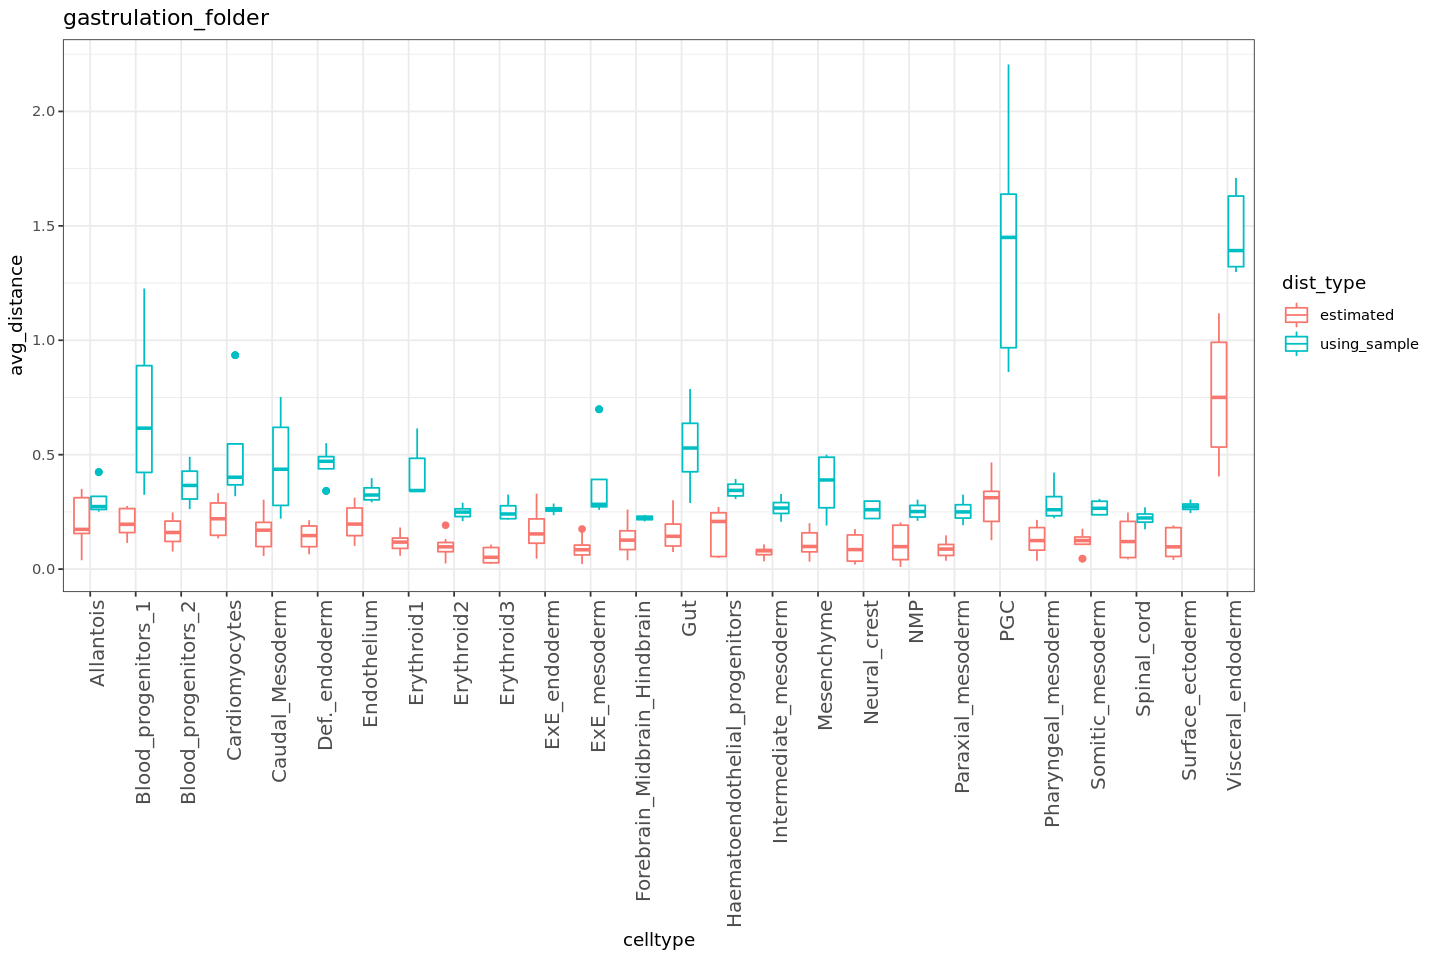

In [95]:
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(dist_df, aes(x = celltype, y = avg_distance, colour = dist_type)) + geom_boxplot() + theme_bw() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12)) + ggtitle(list.files(all_dir)[2])

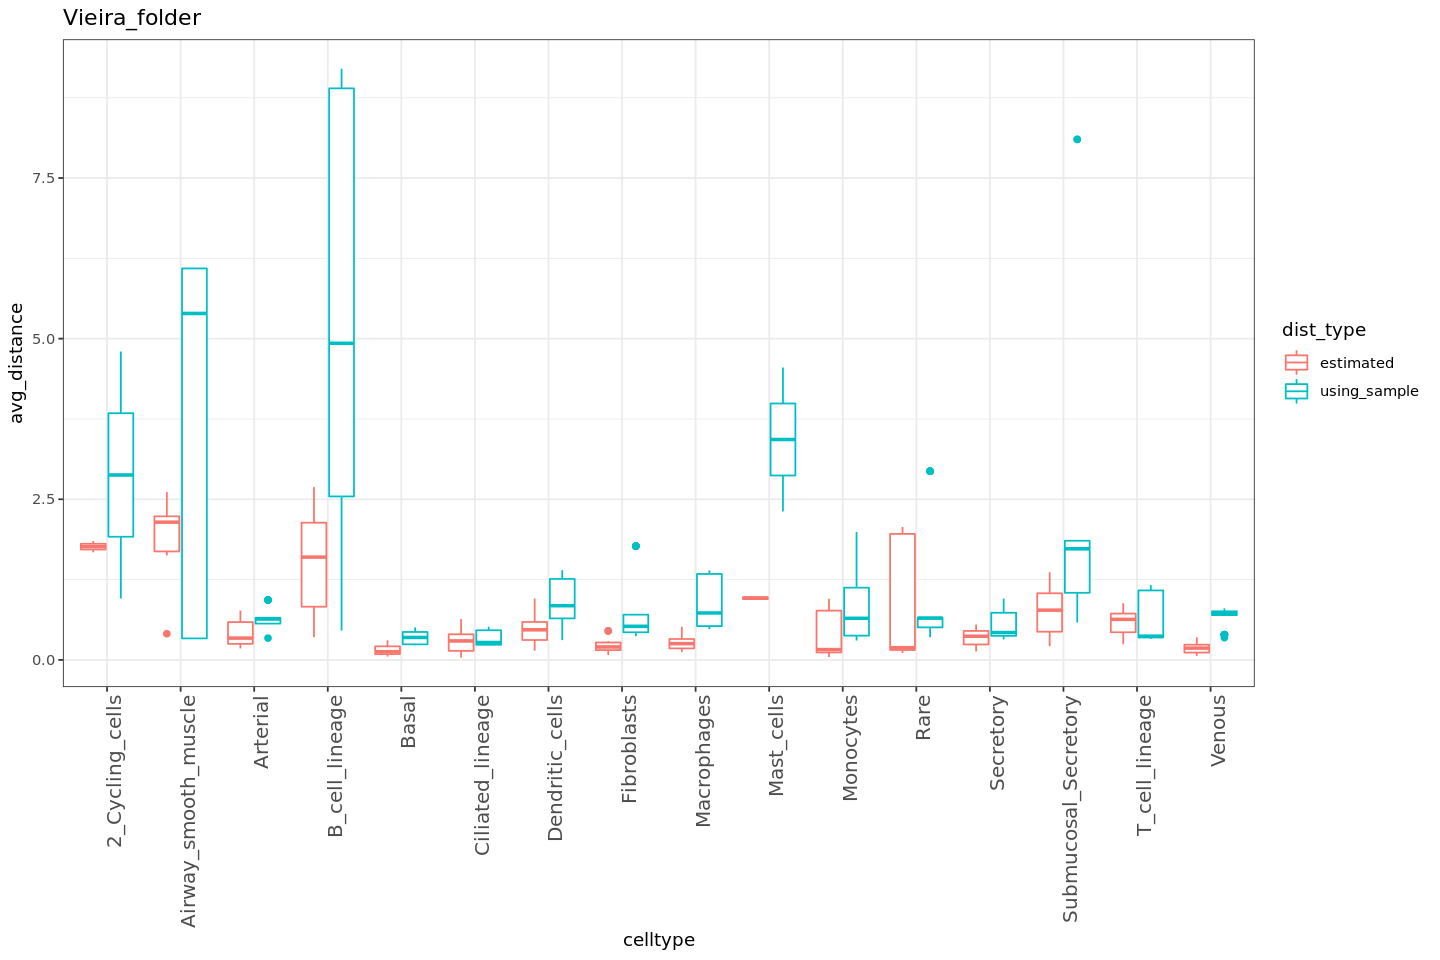

In [87]:
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(dist_df, aes(x = celltype, y = avg_distance, colour = dist_type)) + geom_boxplot() + theme_bw() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12)) + ggtitle(list.files(all_dir)[6])

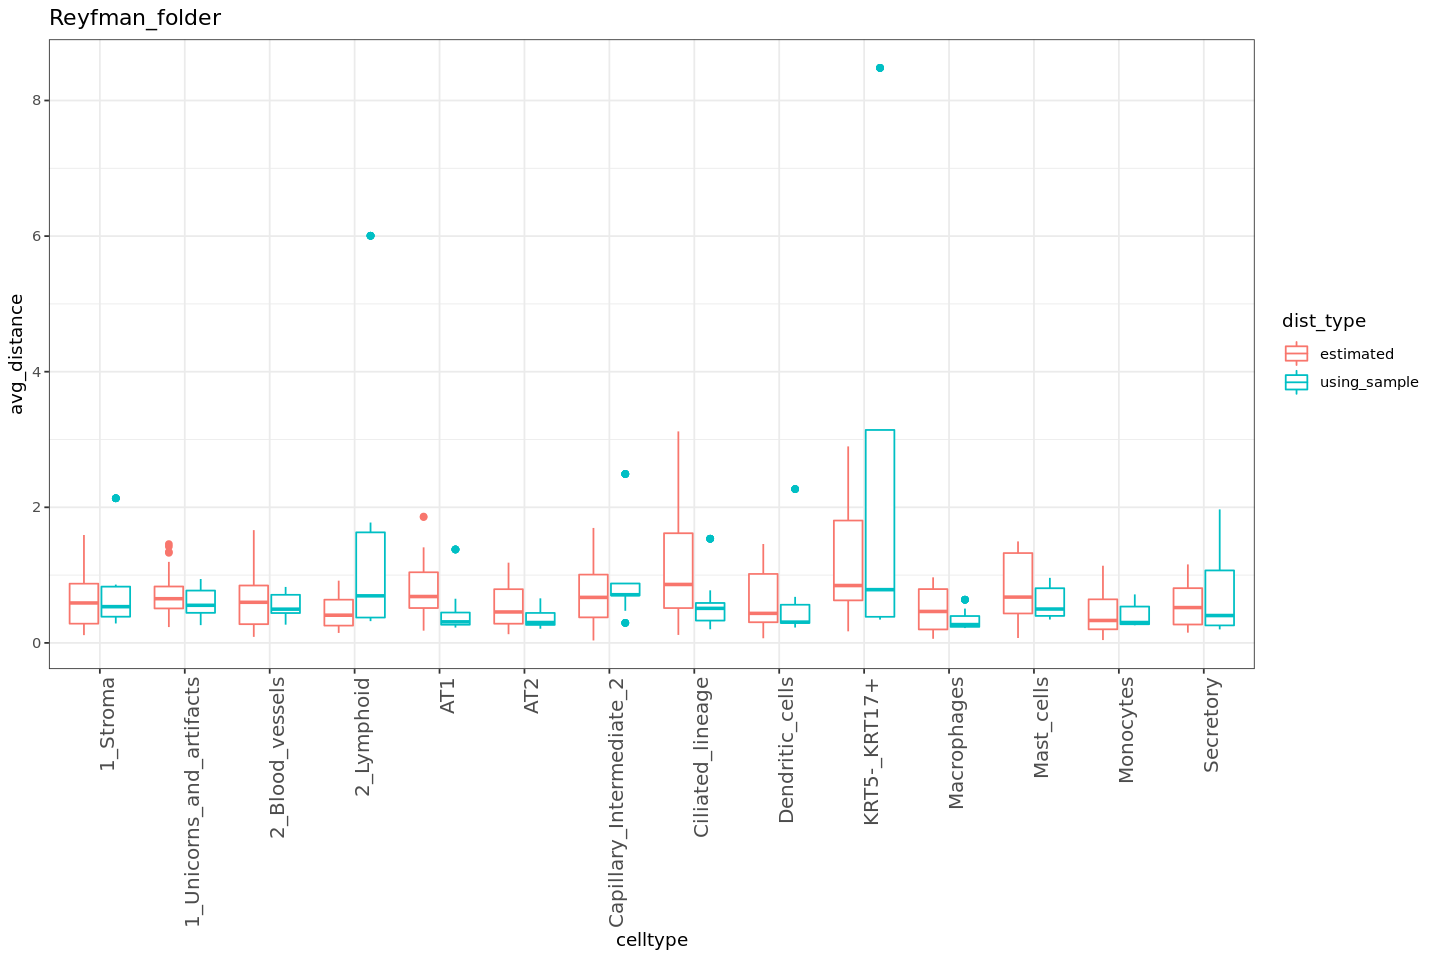

In [81]:
ggplot(dist_df, aes(x = celltype, y = avg_distance, colour = dist_type)) + geom_boxplot() + theme_bw() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12)) + ggtitle(list.files(all_dir)[5])

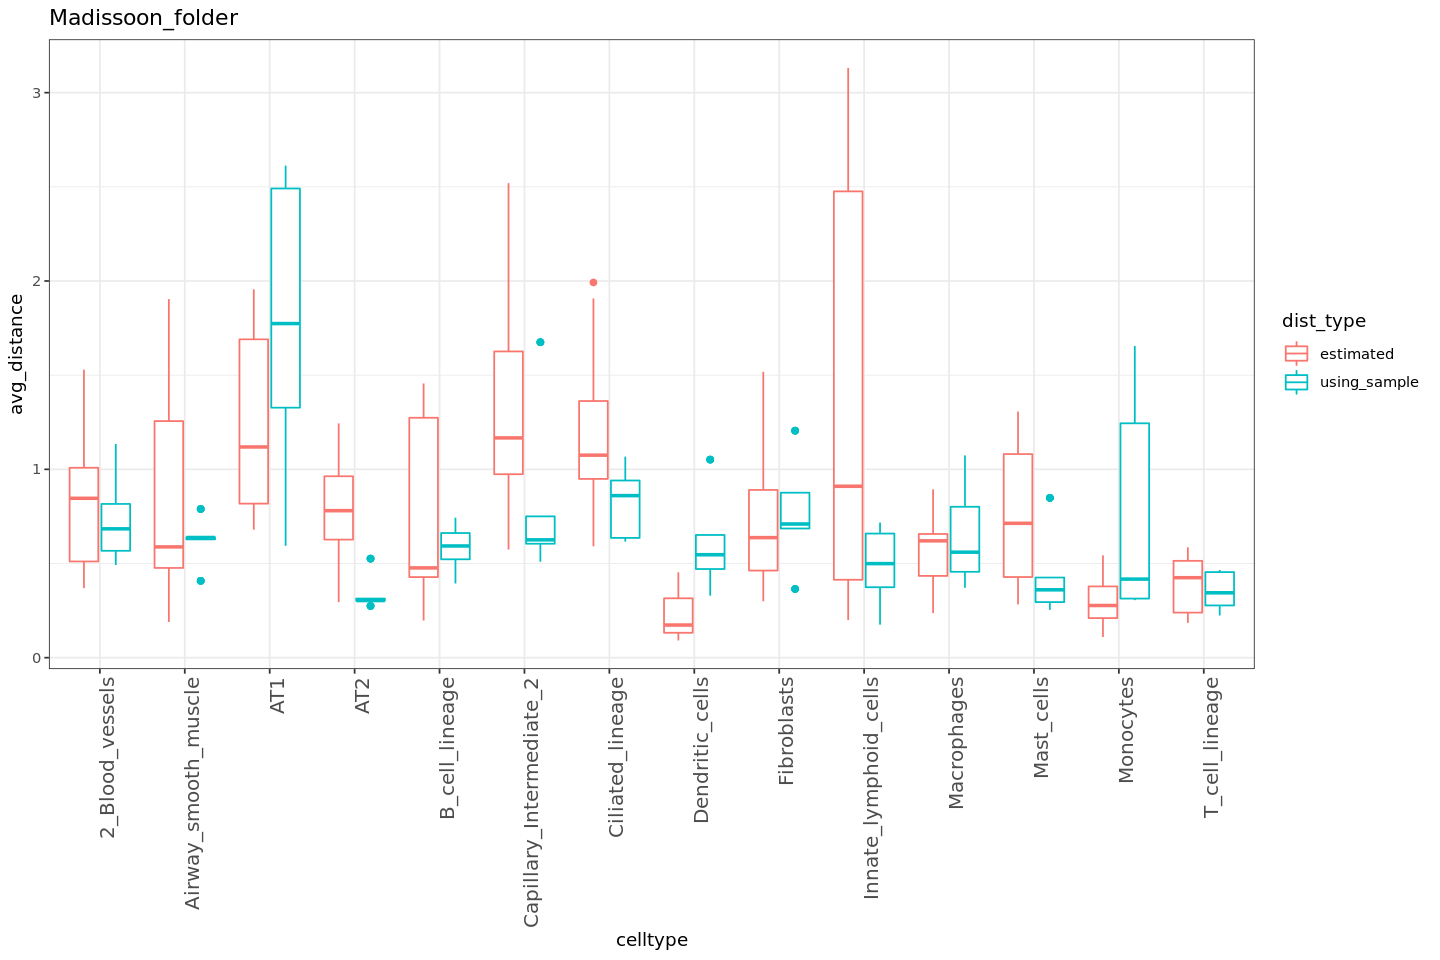

In [69]:
ggplot(dist_df, aes(x = celltype, y = avg_distance, colour = dist_type)) + geom_boxplot() + theme_bw() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12)) + ggtitle(list.files(all_dir)[4])

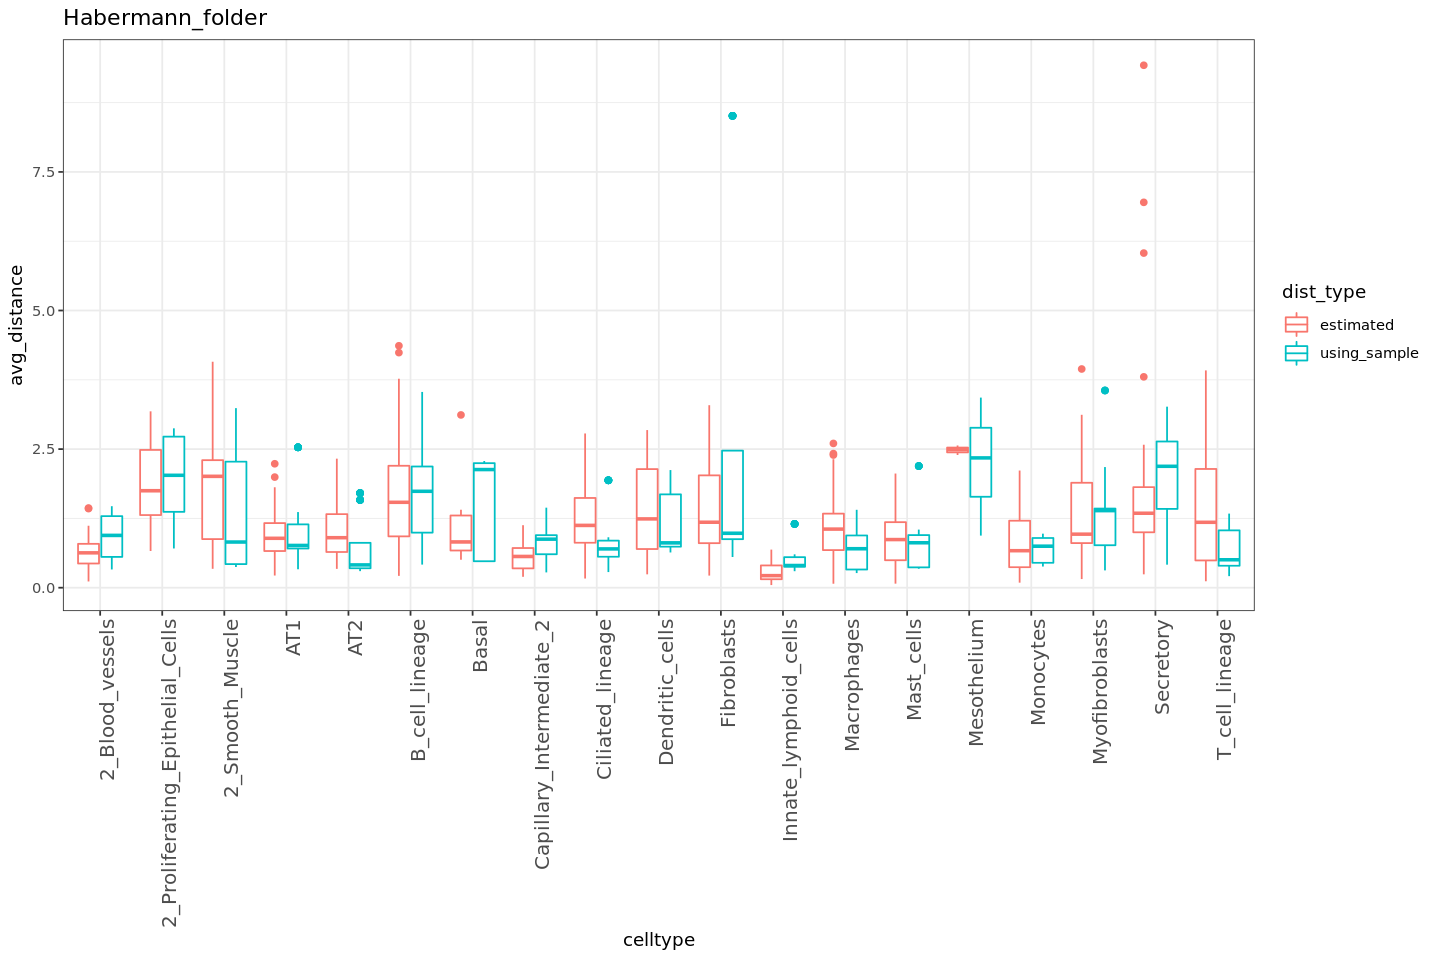

In [75]:
ggplot(dist_df, aes(x = celltype, y = avg_distance, colour = dist_type)) + geom_boxplot() + theme_bw() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12)) + ggtitle(list.files(all_dir)[3])

In [42]:
nrow(dist_df)

[1] 1014

In [ ]:
dist_df = data.frame()

for (file in myfiles){
    celltype = gsub("\\.full.*","",gsub("celltype_","",file))
    sample1 = gsub(".*\\.full_","",gsub("\\.partial_sample_.*","",file))
    sample2 = gsub(".*\\.partial_","",gsub(".csv","",file))
    filename = paste0(mydir,file)
#     print(filename)
    df = read.csv(filename, row.names = 1)
#     print(head(df,2))
    dist1 = get_distance_from_df(df)[1]
    dist2 = get_distance_from_df(df)[2]
    dist_df = rbind(dist_df, data.frame(sample1 = sample1, sample2 = sample2, celltype = celltype, 
                                        avg_distance_est = dist1, avg_distance_sample = dist2, 
                                        n_genes = nrow(df), 
                                        ncells_sample1 = df$n_cells_sample1[1], 
                                        ncells_sample2 = df$n_cells_sample2[1]))
}

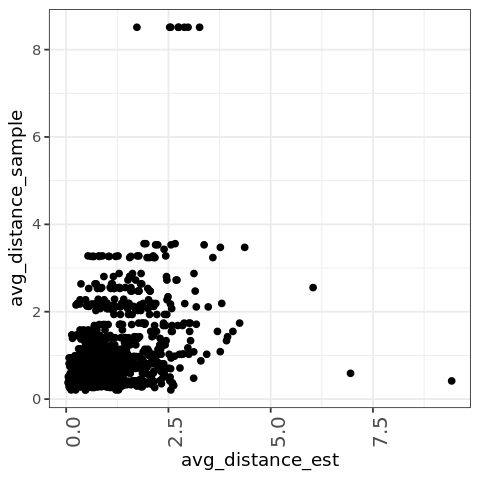

In [43]:
options(repr.plot.width = 4, repr.plot.height = 4)
ggplot(dist_df, aes(x = avg_distance_est, y = avg_distance_sample)) + geom_point() + theme_bw() +
    theme(legend.position = "none", axis.text.x = element_text(angle = 90, hjust = 1, size = 12))

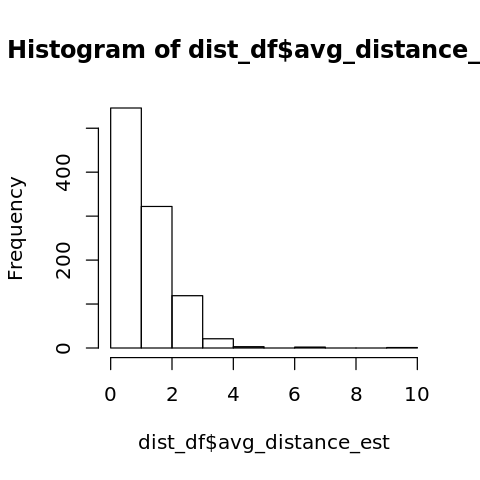

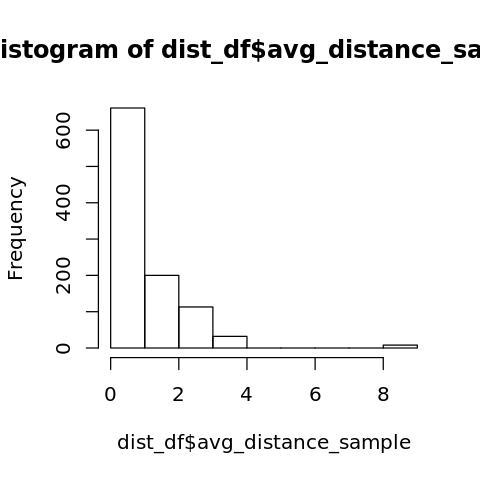

In [44]:
hist(dist_df$avg_distance_est)
hist(dist_df$avg_distance_sample)